In [1]:
import numpy as np
from nz_model import NzModel
import matplotlib.pyplot as plt
from modified_redshift import custom_nz
from modified_redshift import custom_nz_lbg
from modified_redshift import custom_nz_int

from modified_redshift import u_dropout
from modified_redshift import g_dropout
from modified_redshift import r_dropout

In [2]:
z_space = np.arange(0, 7, 0.01)

In [3]:
model = NzModel(z_space)

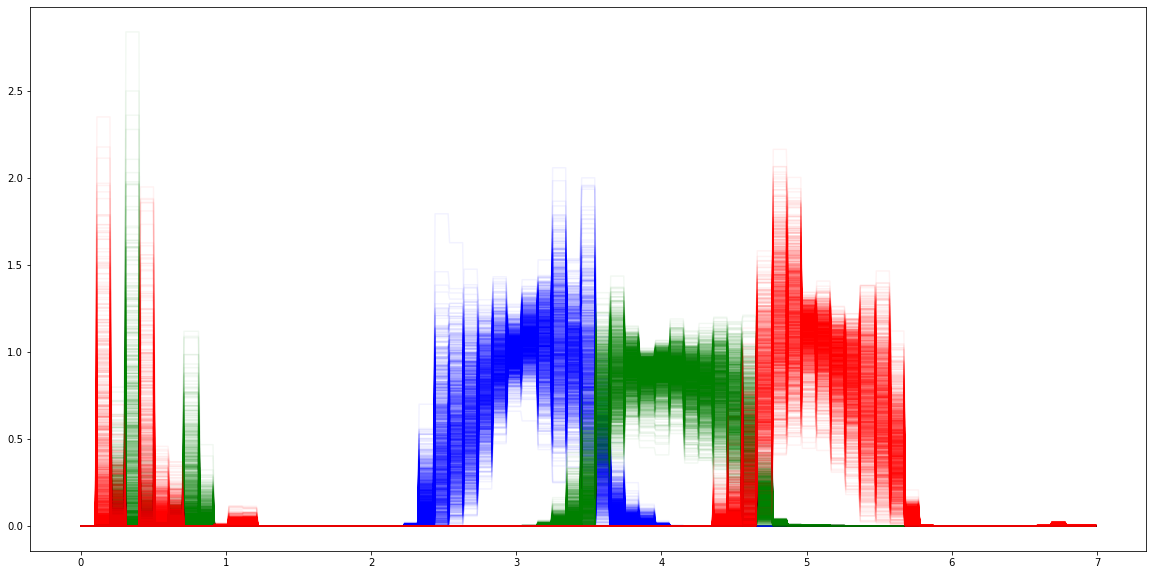

In [4]:
model.plot_all_pca(4, 2000)

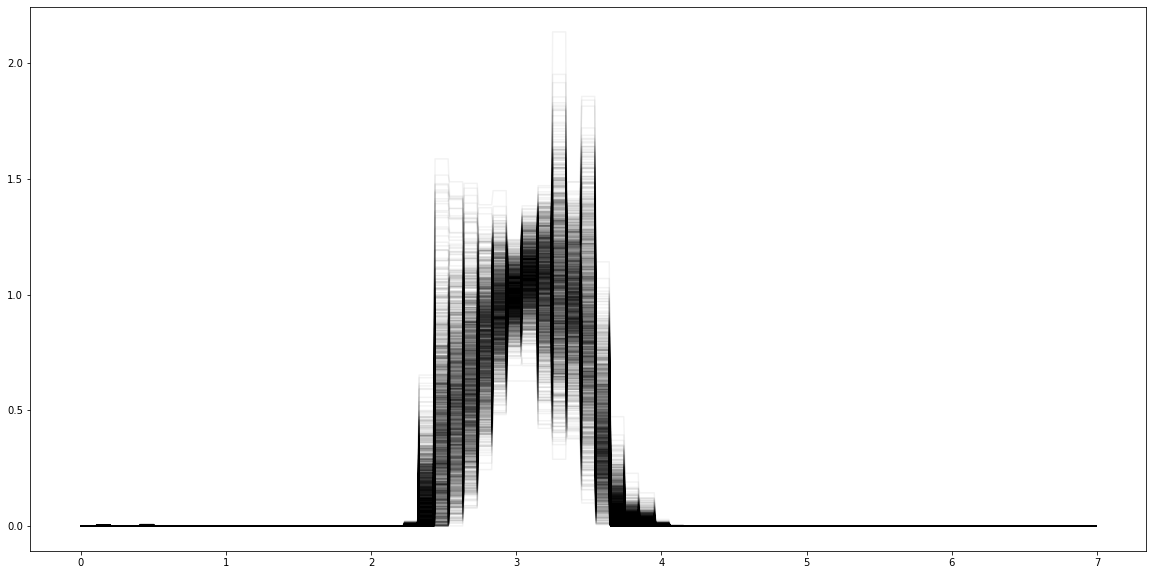

In [5]:
model.plot_nzs(model.u_pca(4, 2000))

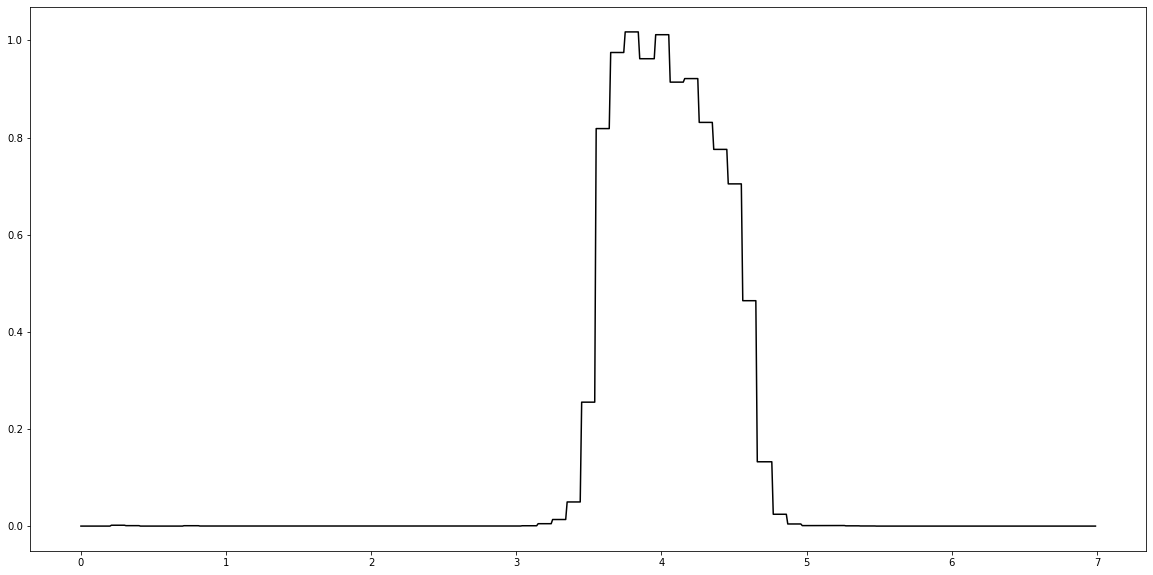

In [6]:
nzs = model.g_pca(4, 100)
nz = nzs[0]
model.plot_nzs(np.array([nz]), alpha=1)

In [7]:
model.interloper_fraction(nz)

0.00037310852539214345

In [8]:
model.normalisation(nz)

0.9999999999999999

In [9]:
model.export_nzs(4, 2000)

In [10]:
nz_u = custom_nz(1, 100, gals_per_arcmin2 = 1)

In [11]:
arr = []
for z in z_space:
    arr.append(nz_u.pz_fn(z))
    
nzz = np.array([np.array(arr)])

In [12]:
nz1 = nzz[0]
nz2 = np.array([np.load("nzgs_pca.npy")[100]])[0]

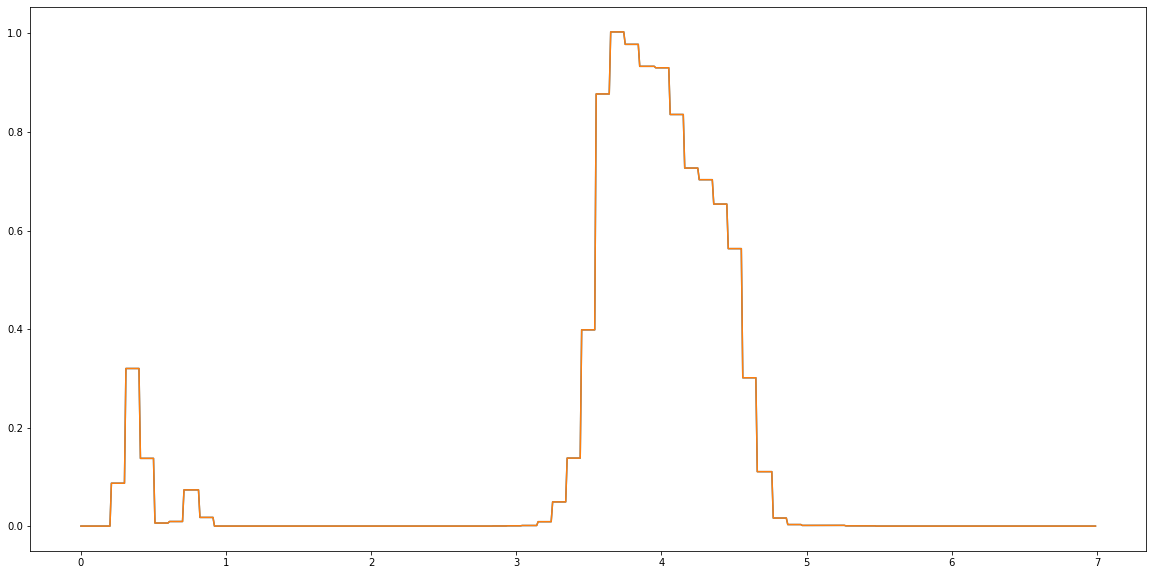

In [13]:
fig = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(z_space, nz1)
plt.plot(z_space, nz2)

In [14]:
nz1_lbg = model.lbg_component(np.array([nz1]))[0]
nz1_int = model.interloper_component(np.array([nz1]))[0]

In [15]:
print(model.interloper_fraction(nz1_lbg), model.interloper_fraction(nz1_int))

0.0 1.0


In [16]:
f = model.interloper_fraction(nz1)
f

0.06584027224517607

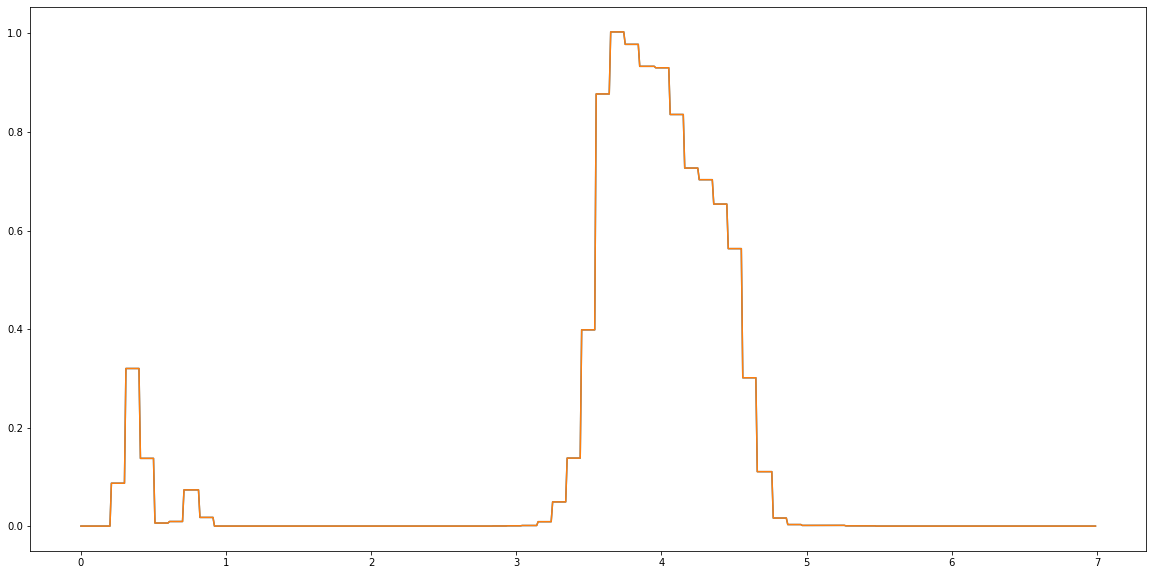

In [17]:
fig = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(z_space, nz1_int*f + (1-f)*nz1_lbg)
plt.plot(z_space, np.array([np.load("nzgs_pca.npy")[100]])[0])

In [18]:
model.interloper_fraction(model.interloper_component(nzz)[0]*f + (1-f)*model.lbg_component(nzz)[0])

0.06584027224517608

In [19]:
testnz = custom_nz(1, 100, gals_per_arcmin2 = 0.1)
testnz_lbg = custom_nz_lbg(1, 100, gals_per_arcmin2 = 0.1)
testnz_int = custom_nz_int(1, 100, gals_per_arcmin2 = 0.1)

In [20]:
nz_all = []
nz_lbg = []
nz_int = []
for z in z_space:
    nz_all.append(testnz.pz_fn(z))
    nz_lbg.append(testnz_lbg.pz_fn(z))
    nz_int.append(testnz_int.pz_fn(z))
    
nz_all = np.array(nz_all)
nz_lbg = np.array(nz_lbg)
nz_int = np.array(nz_int)

0.06584027224517607


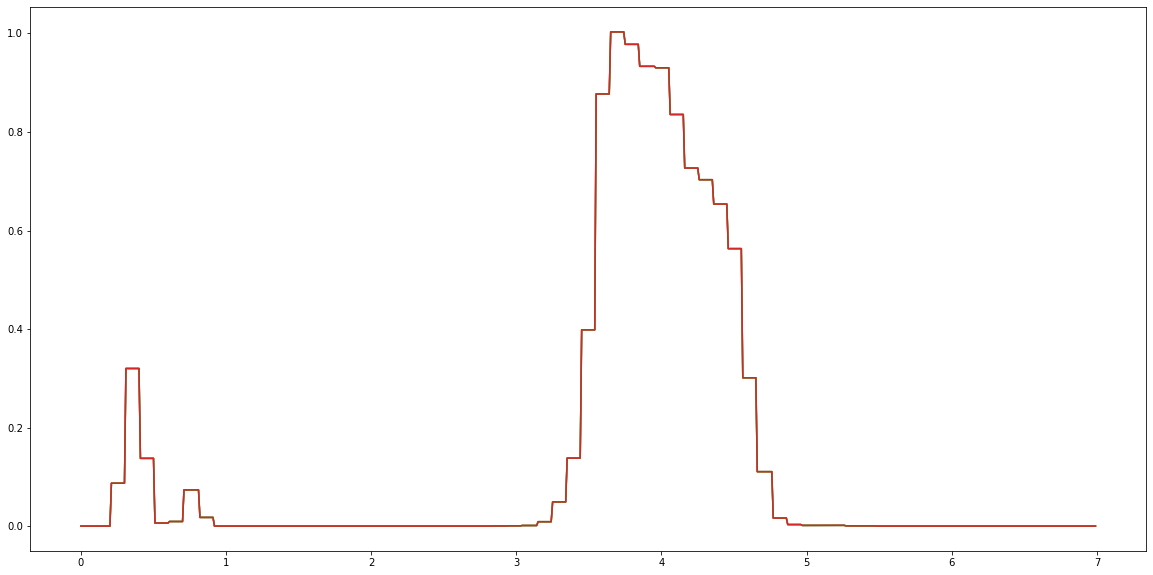

In [21]:
fig = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(z_space, nz_all)
f = model.interloper_fraction(nz_all)
print(f)
plt.plot(z_space, f*nz_int+(1-f)*nz_lbg)

plt.plot(z_space, nz1_int*f + (1-f)*nz1_lbg)
plt.plot(z_space, np.array([np.load("nzgs_pca.npy")[100]])[0])

In [22]:
from nz_model import perform_npca
from nz_model import gauss_npca

In [23]:
bin_data = model.u_data()
components = 10

In [24]:
bin_pca = perform_npca(bin_data, components)

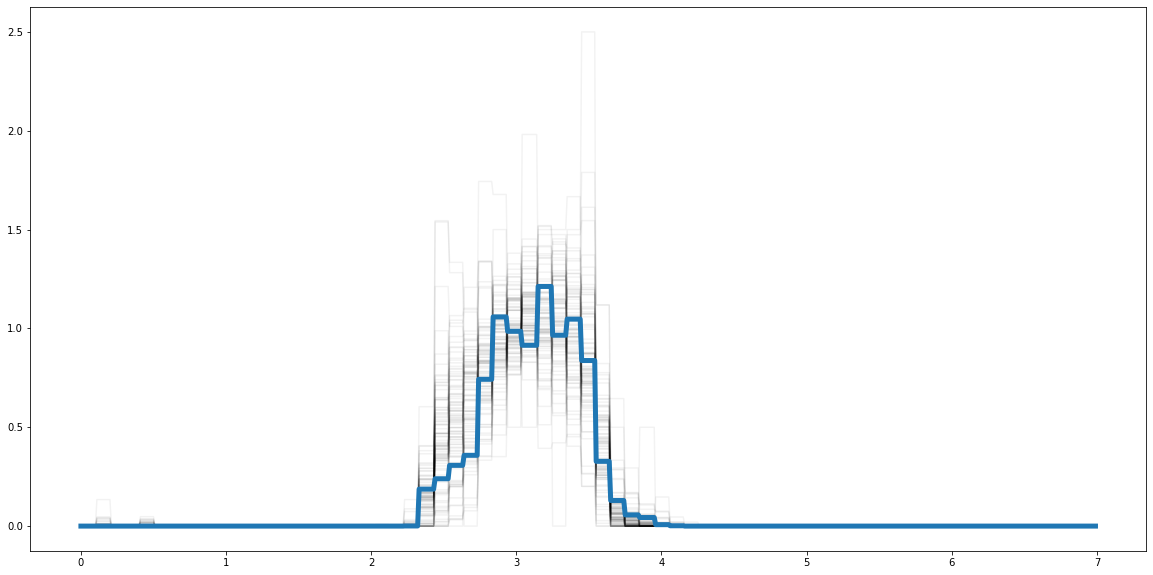

In [25]:
model.plot_nzs(bin_data)
plt.plot(z_space, gauss_npca(bin_pca, 1)[0], lw=5)

In [26]:
model.save_4pca_data()

In [36]:
nz_u = u_dropout((0.5, 0.5, 0.5, 0.5), gals_per_arcmin2 = 1)

In [37]:
arr = []
for z in z_space:
    arr.append(nz_u.pz_fn(z))
    
nzz = np.array(arr)

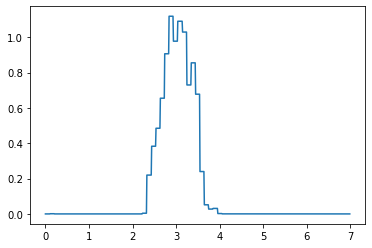

In [38]:
plt.plot(z_space, nzz)

In [54]:
means = np.load("4pca_means_g.npy")
means

array([ 1.13242749e-15, -2.49800181e-17, -1.83186799e-16, -9.05941988e-16])

In [55]:
cov = np.load("4pca_cov_g.npy")
cov

array([[ 3.28193345e+00, -1.17569344e-15, -8.99926092e-16,
         3.14855926e-16],
       [-1.17569344e-15,  1.64900647e+00,  3.34700330e-15,
         3.77395960e-16],
       [-8.99926092e-16,  3.34700330e-15,  4.01496004e-01,
         1.77759958e-16],
       [ 3.14855926e-16,  3.77395960e-16,  1.77759958e-16,
         2.45949786e-01]])

In [90]:
nz_params = np.random.multivariate_normal(means, cov)

In [91]:
nz_g = g_dropout(nz_params, gals_per_arcmin2 = 1)

In [92]:
arr = []
for z in z_space:
    arr.append(nz_g.pz_fn(z))
    
nzz = np.array(arr)

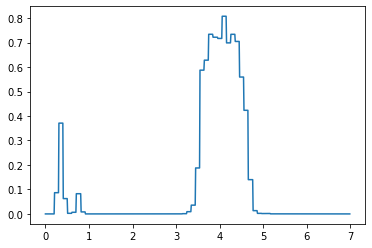

In [93]:
plt.plot(z_space, nzz)